In [1]:

from src.dataset import Raven
from src.model import CLIP
from PIL import Image
import numpy as np
import requests
import matplotlib.pyplot as plt
import cv2
from src.const import SHAPES, ANGLES, SIZES, COLORS

%matplotlib inline

In [2]:
PATH = './dataset/RAVEN-10000/'
fig_types = ['center_single']

In [3]:
test_set = Raven(PATH, 'test', fig_types[0])
test_set.load_data()

Loading item: 0


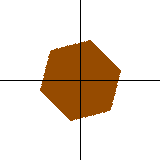

In [23]:
test_set.get_puzzle(0)[3]

In [5]:
net = CLIP(model_name="openai/clip-vit-base-patch32")

In [188]:
template_type = ['The figure is shaped as a {}'.format(value) for value in SHAPES.values()]
template_color = ['The color of the figure is {}'.format(value) for value in COLORS.values()]
# 'The figure is rotated by {} degrees'
template_angle = ['The figure is rotated by {} degrees'.format(value) for value in ANGLES.values()]
template_sizes = ['The proportion of the image covered by the figure is {}'.format(value) for value in SIZES.values()]

In [189]:
answers = []

for i in range(test_set.len()):
    puzzle = test_set.get_puzzle(i)
    puzzle_answers = {}
    for j, c_image in enumerate(puzzle):
        inter = {}
        inter['Type'] = (net.forward(c_image, template_type)).split()[-1]
        inter['Color'] = (net.forward(c_image, template_color)).split()[-1]
        
        inter['Angle'] = (net.forward(c_image, template_angle)).split()[-1]
        inter['Size'] = (net.forward(c_image, template_sizes)).split()[-1]
        
        puzzle_answers[j] = inter
        
    answers.append(puzzle_answers)

In [190]:
answers[0]

{0: {'Type': 'circle', 'Color': 'purple', 'Angle': 'degrees', 'Size': '0.4'},
 1: {'Type': 'circle', 'Color': 'pink', 'Angle': 'degrees', 'Size': '0.4'},
 2: {'Type': 'circle', 'Color': 'teal', 'Angle': 'degrees', 'Size': '0.4'},
 3: {'Type': 'hexagon', 'Color': 'brown', 'Angle': 'degrees', 'Size': '0.4'},
 4: {'Type': 'hexagon', 'Color': 'orange', 'Angle': 'degrees', 'Size': '0.8'},
 5: {'Type': 'hexagon', 'Color': 'purple', 'Angle': 'degrees', 'Size': '0.8'},
 6: {'Type': 'square', 'Color': 'blue', 'Angle': 'degrees', 'Size': '0.4'},
 7: {'Type': 'square', 'Color': 'yellow', 'Angle': 'degrees', 'Size': '0.4'},
 8: {'Type': 'square', 'Color': 'cyan', 'Angle': 'degrees', 'Size': '0.7'},
 9: {'Type': 'circle', 'Color': 'cyan', 'Angle': 'degrees', 'Size': '0.4'},
 10: {'Type': 'triangle', 'Color': 'cyan', 'Angle': 'degrees', 'Size': '0.7'},
 11: {'Type': 'square', 'Color': 'green', 'Angle': 'degrees', 'Size': '0.4'},
 12: {'Type': 'square', 'Color': 'cyan', 'Angle': 'degrees', 'Size': '0

In [9]:
test_set.get_answers(0)

{0: {'Type': 'circle', 'Color': 'purple', 'Angle': '180', 'Size': 0.8},
 1: {'Type': 'circle', 'Color': 'pink', 'Angle': '180', 'Size': 0.8},
 2: {'Type': 'circle', 'Color': 'teal', 'Angle': '180', 'Size': 0.8},
 3: {'Type': 'hexagon', 'Color': 'brown', 'Angle': '-135', 'Size': 0.5},
 4: {'Type': 'hexagon', 'Color': 'orange', 'Angle': '-135', 'Size': 0.5},
 5: {'Type': 'hexagon', 'Color': 'purple', 'Angle': '-135', 'Size': 0.5},
 6: {'Type': 'square', 'Color': 'blue', 'Angle': '180', 'Size': 0.9},
 7: {'Type': 'square', 'Color': 'yellow', 'Angle': '180', 'Size': 0.9},
 8: {'Type': 'square', 'Color': 'cyan', 'Angle': '180', 'Size': 0.7},
 9: {'Type': 'circle', 'Color': 'cyan', 'Angle': '180', 'Size': 0.9},
 10: {'Type': 'triangle', 'Color': 'cyan', 'Angle': '180', 'Size': 0.9},
 11: {'Type': 'square', 'Color': 'green', 'Angle': '180', 'Size': 0.9},
 12: {'Type': 'square', 'Color': 'cyan', 'Angle': '180', 'Size': 0.8},
 13: {'Type': 'square', 'Color': 'cyan', 'Angle': '180', 'Size': 0.9}

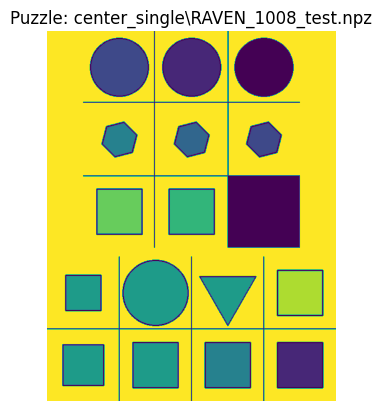

In [10]:
test_set.plot_puzzle(0)